In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns
import sklearn

In [2]:

d_icd = pd.read_csv("/Users/mirai/Desktop/uni/uni_master_2022/semester_2/KIinMed/project/data/DIAGNOSES_ICD.csv")
d_icd_all = pd.read_csv("/Users/mirai/Desktop/uni/uni_master_2022/semester_2/KIinMed/project/data/DIAGNOSES_ICD.csv")



In [3]:
icd_names = pd.read_csv("/Users/mirai/Desktop/uni/uni_master_2022/semester_2/KIinMed/project/data/D_ICD_DIAGNOSES.csv")


## DATA


In [61]:
X = pd.read_csv("unique_subject_ids_df.csv")

In [62]:
X = X.dropna()

In [63]:

X['AGE_GROUP'] = pd.cut(X['Age'] , bins = [0,20,30,40,50,60,70,80,120], labels=['0-20','20-30', '30-40','40-50', '50-60', '60-70', '70-80', '80+'])

In [64]:
X

,SUBJECT_ID,INFECTIONS,NEOPLASMS,DISORDERS OF THYROID GLAND,DISEASES OF ENDOCRINE GLANDS,"NUTRITIONAL, METABOLIC DISEASE AND IMMUNITY DISORDERS",DISEAESE OF BLOOD,MENTAL DISORDERS,DISEASES OF NERVOUS SYSTEM,DISORDERS OF THE EYE,...,DISEASES OF THE M GENITAL ORGANS,DISORDERS OF F GENITAL TRACT,DISEASES OF THE SKIN/TISSUE,DISEASES OF THE MUSCULOSKELETAL SYSTEM AND CONNECTIVE TISSUE,CONGENITAL ANOMALIES,COMPLICATIONS OF PREGNANCY OR CHILDBIRTH,INJURY/POISONING,Age,Gender,AGE_GROUP
0,25,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,58.9500,1.0,50-60
2,192,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,64.4367,1.0,60-70
3,234,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,52.5925,1.0,50-60
4,263,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,55.5604,1.0,50-60
5,271,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,45.6848,0.0,40-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,99294,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,51.9190,0.0,50-60
995,99383,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,28.1567,1.0,20-30
996,99444,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,37.1452,1.0,30-40
997,99650,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,50.9115,0.0,50-60


In [65]:
yess1 = X.groupby(["AGE_GROUP"])["SUBJECT_ID"].count()
yess1

AGE_GROUP
0-20      13
20-30    106
30-40    119
40-50    216
50-60    222
60-70    155
70-80     85
80+        9
Name: SUBJECT_ID, dtype: int64

In [66]:
X = X.drop('Age', axis = 1)

In [67]:
X

,SUBJECT_ID,INFECTIONS,NEOPLASMS,DISORDERS OF THYROID GLAND,DISEASES OF ENDOCRINE GLANDS,"NUTRITIONAL, METABOLIC DISEASE AND IMMUNITY DISORDERS",DISEAESE OF BLOOD,MENTAL DISORDERS,DISEASES OF NERVOUS SYSTEM,DISORDERS OF THE EYE,...,DISEASES OF THE URINARY SYSTEM,DISEASES OF THE M GENITAL ORGANS,DISORDERS OF F GENITAL TRACT,DISEASES OF THE SKIN/TISSUE,DISEASES OF THE MUSCULOSKELETAL SYSTEM AND CONNECTIVE TISSUE,CONGENITAL ANOMALIES,COMPLICATIONS OF PREGNANCY OR CHILDBIRTH,INJURY/POISONING,Gender,AGE_GROUP
0,25,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1.0,50-60
2,192,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1.0,60-70
3,234,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1.0,50-60
4,263,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1.0,50-60
5,271,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,40-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,99294,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0.0,50-60
995,99383,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1.0,20-30
996,99444,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1.0,30-40
997,99650,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0.0,50-60


In [68]:
X_neu = pd.get_dummies(X['AGE_GROUP'])

In [69]:
X = pd.concat([X, X_neu], axis = 1)

In [70]:
X = X.drop('AGE_GROUP', axis = 1)

In [71]:
X = X.drop('SUBJECT_ID', axis = 1)

In [72]:
X

,INFECTIONS,NEOPLASMS,DISORDERS OF THYROID GLAND,DISEASES OF ENDOCRINE GLANDS,"NUTRITIONAL, METABOLIC DISEASE AND IMMUNITY DISORDERS",DISEAESE OF BLOOD,MENTAL DISORDERS,DISEASES OF NERVOUS SYSTEM,DISORDERS OF THE EYE,DISEASES OF CIRCULATORY SYSTEM,...,INJURY/POISONING,Gender,0-20,20-30,30-40,40-50,50-60,60-70,70-80,80+
0,0,0,1,0,0,0,0,0,0,0,...,0,1.0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1.0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,1.0,0,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,1.0,0,0,0,0,1,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0.0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,0,0,0,0,0,0,0,1,0,0,...,0,0.0,0,0,0,0,1,0,0,0
995,0,0,0,0,0,0,0,1,0,0,...,0,1.0,0,1,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,1.0,0,0,1,0,0,0,0,0
997,0,0,0,0,0,0,0,0,1,0,...,0,0.0,0,0,0,0,1,0,0,0


## PCA

In [73]:
from sklearn.decomposition import PCA

In [74]:
X_PCA = X.to_numpy()

In [75]:
X_PCA = X_PCA.astype(int)

In [76]:
pca = PCA(n_components=2)
pca.fit(X_PCA)

PCA(n_components=2)

In [77]:
print(pca.singular_values_)


[15.64677716 14.67782669]


## K MEANS

In [78]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

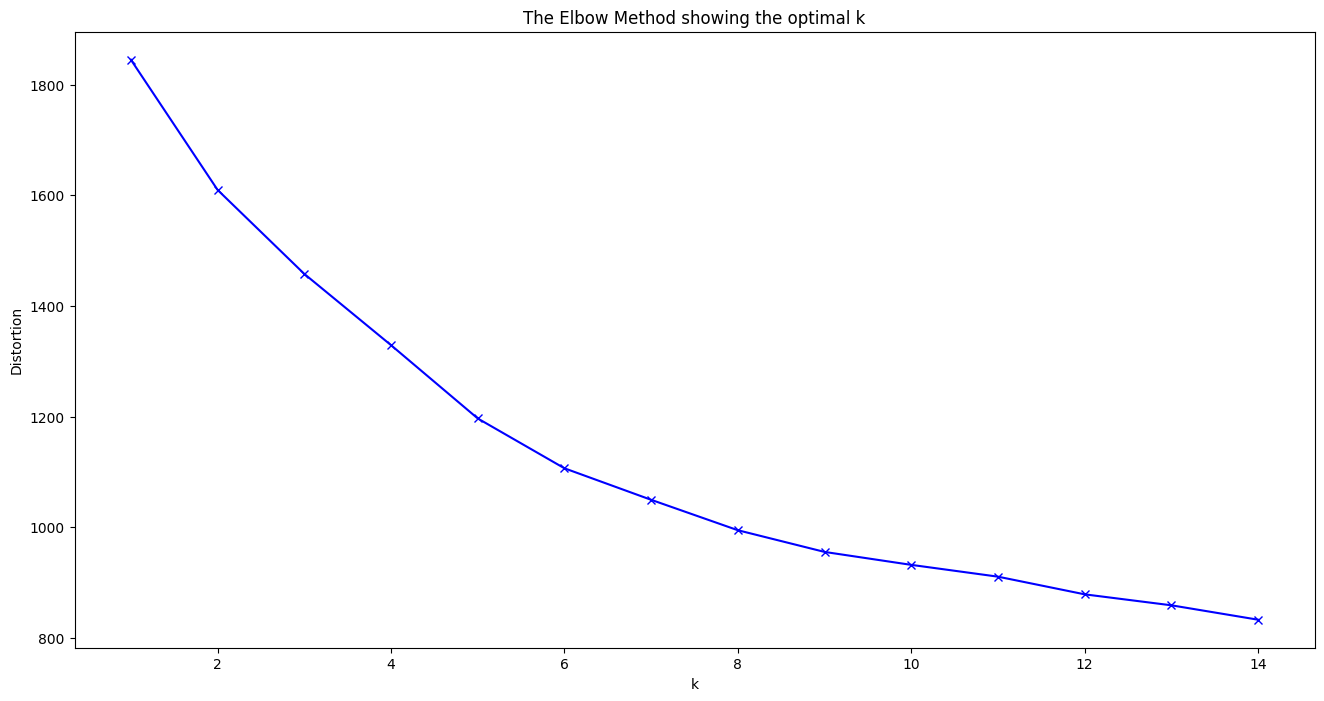

In [79]:
distortions = []
K = range(1,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)


plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [80]:
kmeans = KMeans(init="random",n_clusters=6,n_init=10,max_iter=100,random_state=42)

In [81]:

kmeans.fit(X)

KMeans(init='random', max_iter=100, n_clusters=6, random_state=42)

In [82]:

label = kmeans.fit_predict(X)

In [84]:
label

array([0, 2, 0, 0, 4, 0, 4, 0, 2, 0, 0, 1, 0, 1, 1, 1, 1, 4, 5, 0, 2, 1,
       1, 0, 0, 0, 5, 0, 3, 4, 0, 0, 0, 4, 4, 1, 1, 4, 3, 4, 0, 1, 2, 1,
       1, 3, 0, 0, 1, 0, 2, 0, 0, 2, 4, 3, 1, 2, 2, 0, 0, 2, 4, 4, 0, 0,
       4, 5, 1, 0, 1, 1, 1, 1, 1, 1, 1, 4, 5, 0, 2, 2, 0, 3, 3, 0, 2, 4,
       1, 0, 0, 4, 5, 5, 1, 3, 1, 5, 5, 0, 4, 4, 4, 5, 4, 4, 2, 2, 0, 0,
       5, 3, 4, 0, 1, 0, 0, 5, 0, 0, 5, 4, 2, 2, 4, 0, 2, 1, 0, 2, 0, 1,
       2, 0, 3, 3, 5, 1, 4, 2, 4, 5, 5, 1, 1, 3, 1, 2, 2, 5, 0, 4, 5, 0,
       1, 2, 1, 0, 4, 1, 4, 0, 3, 2, 0, 4, 0, 5, 4, 0, 2, 0, 2, 2, 0, 0,
       0, 1, 3, 1, 2, 3, 4, 1, 3, 1, 1, 2, 4, 4, 0, 5, 2, 2, 4, 3, 1, 3,
       0, 4, 2, 4, 0, 1, 2, 3, 3, 2, 0, 4, 0, 3, 3, 5, 1, 5, 1, 2, 3, 4,
       1, 4, 0, 1, 0, 1, 3, 1, 0, 2, 3, 4, 4, 3, 5, 4, 3, 4, 3, 1, 1, 4,
       2, 3, 0, 2, 5, 5, 1, 5, 1, 1, 0, 1, 3, 1, 4, 5, 5, 1, 5, 0, 4, 0,
       0, 3, 2, 2, 0, 4, 0, 2, 0, 1, 2, 2, 5, 1, 4, 2, 5, 2, 4, 5, 0, 0,
       5, 4, 5, 3, 4, 5, 0, 0, 2, 4, 2, 2, 0, 5, 2,

In [83]:
#Getting unique labels
 
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(X[label == i , 0] , X[label == i , 1] , label = i)
plt.legend()
plt.show()

InvalidIndexError: (array([ True, False,  True,  True, False,  True, False,  True, False,
        True,  True, False,  True, False, False, False, False, False,
       False,  True, False, False, False,  True,  True,  True, False,
        True, False, False,  True,  True,  True, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False,  True,  True, False,  True, False,  True,  True, False,
       False, False, False, False, False,  True,  True, False, False,
       False,  True,  True, False, False, False,  True, False, False,
       False, False, False, False, False, False, False,  True, False,
       False,  True, False, False,  True, False, False, False,  True,
        True, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
        True,  True, False, False, False,  True, False,  True,  True,
       False,  True,  True, False, False, False, False, False,  True,
       False, False,  True, False,  True, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
        True, False, False, False,  True, False, False, False,  True,
       False, False,  True, False,  True, False, False,  True, False,
        True, False, False,  True,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
        True, False, False, False,  True, False, False, False, False,
       False,  True, False,  True, False, False, False, False, False,
       False, False, False, False, False, False,  True, False,  True,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
        True, False,  True,  True, False, False, False,  True, False,
        True, False,  True, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True, False, False,
       False, False, False, False,  True,  True, False, False, False,
       False,  True, False, False, False,  True, False, False, False,
       False, False,  True, False, False,  True, False,  True, False,
       False,  True, False, False, False, False, False, False, False,
        True, False, False,  True, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False,  True, False, False,  True, False,
       False, False,  True, False,  True, False, False, False, False,
       False,  True, False,  True, False, False,  True, False, False,
        True, False, False, False,  True,  True, False, False,  True,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False,  True, False, False, False, False, False,  True, False,
        True, False, False, False,  True, False, False, False,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False,  True,  True,
       False, False, False,  True, False,  True,  True, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False,  True, False, False,  True, False, False,  True,
       False, False,  True, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False,  True,
       False,  True, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
        True, False,  True,  True, False, False,  True, False, False,
       False, False, False, False,  True,  True, False, False,  True,
       False, False, False,  True, False, False, False, False, False,
       False,  True,  True,  True,  True, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
        True, False, False, False,  True, False, False,  True,  True,
       False,  True, False, False,  True, False, False, False, False,
       False,  True, False, False, False,  True, False, False,  True,
       False,  True,  True, False, False, False, False, False,  True,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False,  True, False,  True, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False,  True, False, False,
       False,  True, False,  True, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False,  True, False, False, False,  True,
       False,  True,  True,  True, False,  True, False,  True, False,
        True, False,  True, False,  True, False,  True,  True, False,
       False,  True, False, False, False, False,  True, False, False,
        True,  True, False,  True, False, False,  True, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False,  True, False, False, False,
       False,  True,  True, False,  True, False, False, False, False,
       False,  True, False, False, False, False, False,  True,  True,
       False,  True,  True, False,  True, False,  True, False, False,
       False,  True,  True, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False,  True,
       False,  True, False,  True, False, False, False, False,  True,
       False, False, False, False, False, False,  True, False,  True,
       False,  True, False, False, False, False, False,  True, False,
        True, False, False, False,  True, False, False, False, False,
       False, False, False, False,  True,  True, False, False, False,
        True, False, False, False,  True, False, False, False,  True,
       False,  True,  True,  True, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True, False,  True, False, False,
       False, False,  True,  True, False, False, False, False, False,
       False, False,  True,  True, False, False,  True, False]), 0)

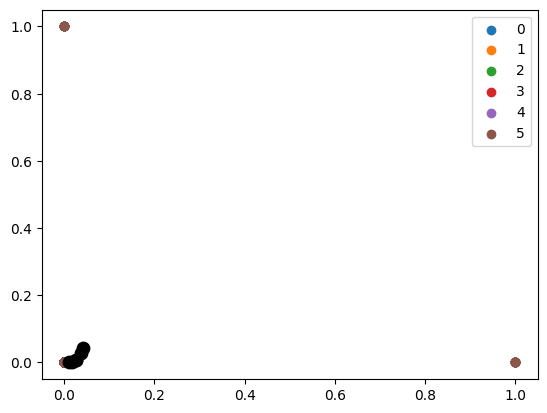

In [86]:
#Getting the Centroids
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(X_PCA[label == i , 0] , X_PCA[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

<Axes: >

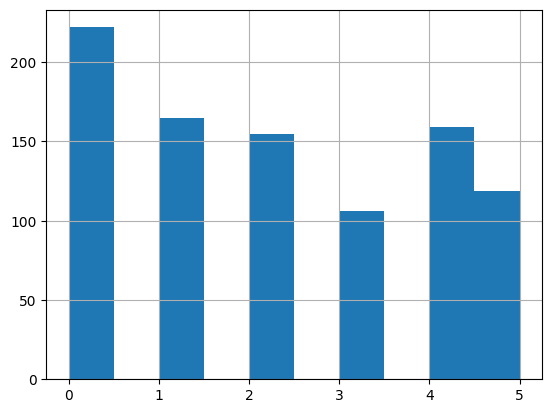

In [87]:
X_df = X
X_df['Class'] = label
X_df['Class'].hist()

## K Modes

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 8839.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 8839.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 8839.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 8839.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 8839.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 8066.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 8569.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Ru

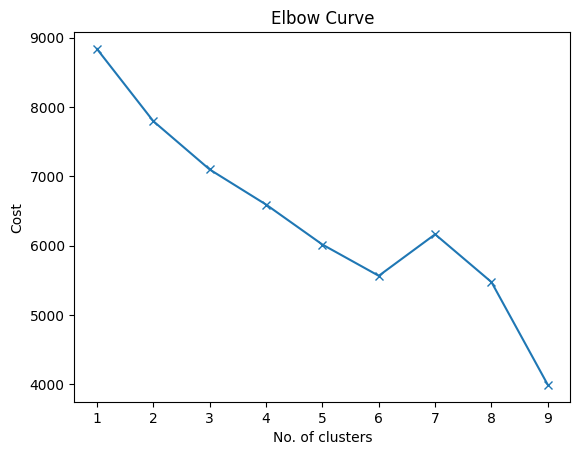

In [239]:
from scipy.stats import mode
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt
%matplotlib inline

# Define the data set with three categorical variables
data = df_neu.to_numpy()

# Elbow curve to find optimal K
cost = []
K = range(1,15)
for k in list(K):
	kmode = KModes(n_clusters=k, init = "random", n_init = 5, verbose=1)
	kmode.fit_predict(data)
	cost.append(kmode.cost_)
	
plt.plot(K, cost, 'x-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Curve')
plt.show()


In [257]:
kmode = KModes(n_clusters=6, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(data)
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 488, cost: 7181.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 6429.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 6653.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 6740.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 7106.0
Best run was number 2


array([0, 2, 0, ..., 0, 4, 0], dtype=uint16)

In [258]:

df_neu['Class'] = clusters

<Axes: >

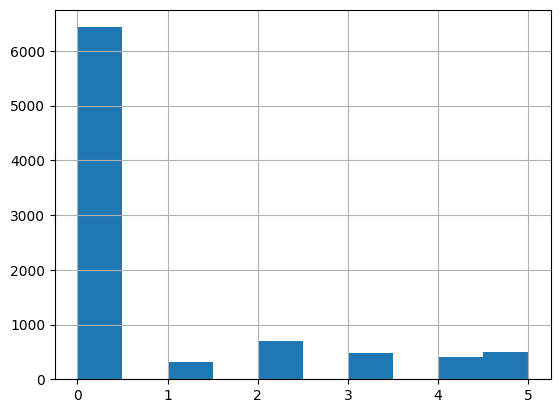

In [259]:

df_neu['Class'].hist()


In [246]:
kmode = KModes(n_clusters=13, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(data)
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2913, cost: 2830.0
Run 1, iteration: 2/100, moves: 397, cost: 2830.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 528, cost: 2969.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 4583.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 3265.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 698, cost: 3999.0
Run 5, iteration: 2/100, moves: 436, cost: 3999.0
Best run was number 1


array([ 5,  6, 12, ..., 11, 10, 12], dtype=uint16)

<Axes: >

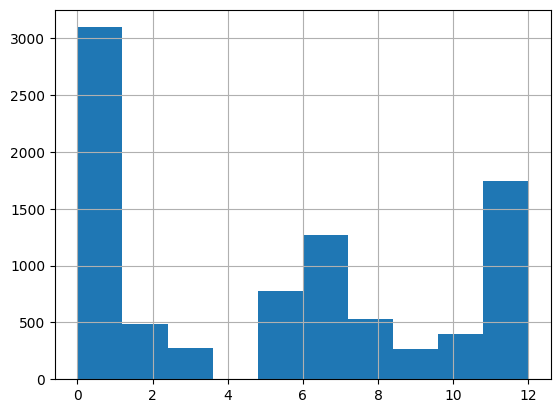

In [247]:
df_neu['Class_1'] = clusters
df_neu['Class_1'].hist()

In [117]:
from sklearn.decomposition import PCA
pca = PCA(2)

# Turn the dummified df into two columns with PCA
plot_columns = pca.fit_transform(data)

'# Plot based on the two dimensions, and shade by cluster label\nplt.scatter(x=plot_columns[:,1], y=plot_columns[:,0], c=df_dummy["clusters"], s=30)\nplt.show()'

In [119]:
X = plot_columns

In [263]:
kmode = KModes(n_clusters=13, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(X)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 320, cost: 3493.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 4212.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 888, cost: 4819.0
Run 3, iteration: 2/100, moves: 526, cost: 4819.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 4617.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 809, cost: 3456.0
Best run was number 5


<Axes: >

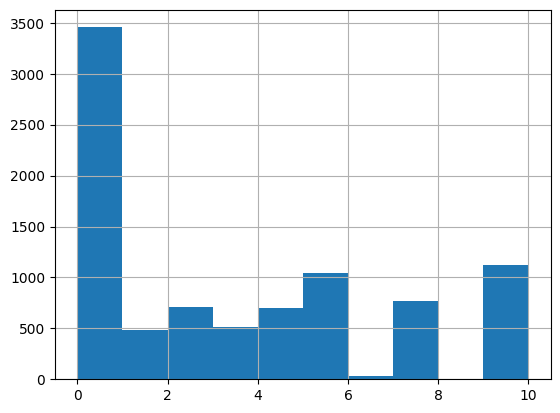

In [264]:
df_neu['Class_3'] = clusters
df_neu['Class_3'].hist()

In [261]:
kmode = KModes(n_clusters=13, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(X)
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1548, cost: 3374.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 438, cost: 3785.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 506, cost: 3838.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 265, cost: 3691.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 3848.0
Best run was number 1


array([ 6,  3, 11, ...,  7,  5, 11], dtype=uint16)

<Axes: >

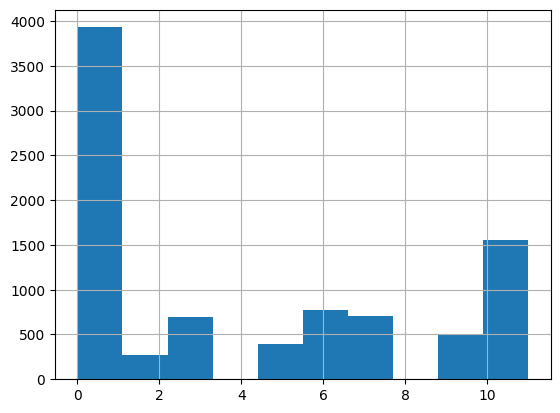

In [262]:
df_neu['Class'] = clusters
df_neu['Class'].hist()

## Feature Hasher

In [144]:
dfs = pd.read_csv('Comorb.csv')

In [145]:
dfs = dfs.groupby(["SUBJECT_ID"])["ICD9_GROUP"].unique() 

In [151]:
X

,INFECTIONS,NEOPLASMS,DISORDERS OF THYROID GLAND,DISEASES OF ENDOCRINE GLANDS,"NUTRITIONAL, METABOLIC DISEASE AND IMMUNITY DISORDERS",DISEAESE OF BLOOD,MENTAL DISORDERS,DISEASES OF NERVOUS SYSTEM,DISORDERS OF THE EYE,DISEASES OF CIRCULATORY SYSTEM,...,0-20,20-30,30-40,40-50,50-60,60-70,70-80,80+,Class,Label
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,2
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,2,4
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,2
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,2
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,2
995,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,3,3
996,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,5,0
997,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,2


In [150]:
dfs

SUBJECT_ID
25       [DISORDERS OF THYROID GLAND, HYPERTENSION, DIS...
141      [DISEASES OF THE DIGESTIVE SYSTEM, DISEASES OF...
192      [DISEASES OF CIRCULATORY SYSTEM, COMPLICATIONS...
234      [DISEAESE OF BLOOD, DISEASES OF THE DIGESTIVE ...
263      [DISORDERS OF THE EYE, DISEASES OF THE DIGESTI...
                               ...                        
99294    [DISEASES OF NERVOUS SYSTEM, DISEASES OF THE M...
99383    [DISEASES OF THE MUSCULOSKELETAL SYSTEM AND CO...
99444    [DISEASES OF THE DIGESTIVE SYSTEM, MENTAL DISO...
99650    [DISEAESE OF BLOOD, DISEASES OF ENDOCRINE GLAN...
99928    [MENTAL DISORDERS, DISORDERS OF THYROID GLAND,...
Name: ICD9_GROUP, Length: 1008, dtype: object

In [147]:
from sklearn.feature_extraction import FeatureHasher

h = FeatureHasher(n_features=2, input_type="string")
raw_X = dfs
f = h.transform(raw_X)
f.toarray()

array([[ 1.,  0.],
       [ 3.,  2.],
       [ 0.,  1.],
       ...,
       [ 3.,  2.],
       [ 1.,  2.],
       [ 0., -1.]])

In [148]:
h = FeatureHasher(n_features=2, input_type="string")
raw_X = dfs
f = h.transform(raw_X)
data = f.toarray()

Initialization complete
Iteration 0, inertia 8232.0.
Iteration 1, inertia 3426.4742063492085.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 4746.0.
Iteration 1, inertia 3426.4742063492085.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 5392.0.
Iteration 1, inertia 3426.4742063492085.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 5392.0.
Iteration 1, inertia 3426.4742063492085.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 4868.0.
Iteration 1, inertia 3426.4742063492085.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 2596.0.
Iteration 1, inertia 2317.6433742923473.
Iteration 2, inertia 2292.1483089004214.
Iteration 3, inertia 2285.8570046979894.
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 7058.0.
Iteration 1, inertia 2616

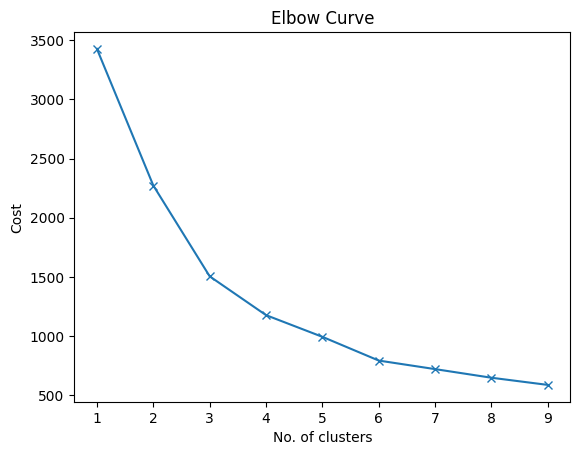

In [149]:
# Elbow curve to find optimal K
cost = []
K = range(1,10)
for k in list(K):
	kmeans = KMeans(n_clusters=k, init = "random", n_init = 5, verbose=1)
	kmeans.fit_predict(data)
	cost.append(kmeans.inertia_)
	
plt.plot(K, cost, 'x-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Curve')
plt.show()

In [99]:
kmeans = KMeans(init="random",n_clusters=4,n_init=10,max_iter=100,random_state=42)
kmeans.fit(data)
labels = kmeans.fit_predict(data)
print(labels)

[0 3 1 ... 3 1 0]


In [102]:
labels

array([0, 3, 1, ..., 3, 1, 0], dtype=int32)

In [140]:
data[:,0]

array([-1.,  0.,  0., ..., -2.,  2., -1.])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


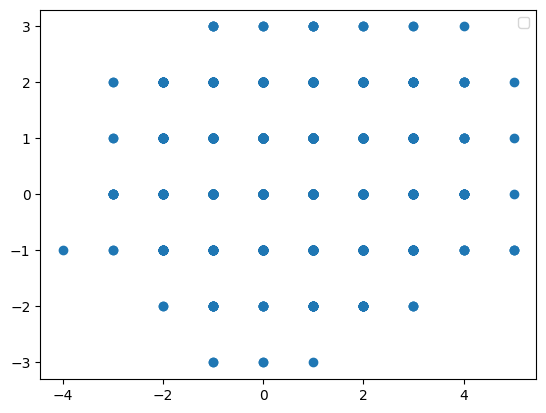

In [291]:
u_labels = np.unique(labels)
 
#plotting the results:
#for i in u_labels:
plt.scatter(data[:,0] , data[:,1])
plt.legend()
plt.show()

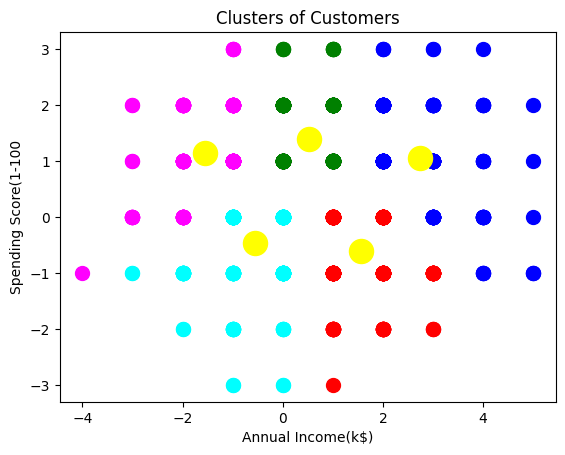

In [141]:
#6 Visualising the clusters
plt.scatter(data[labels==0, 0], data[labels==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(data[labels==1, 0], data[labels==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(data[labels==2, 0], data[labels==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(data[labels==3, 0], data[labels==3, 1], s=100, c='cyan', label ='Cluster 4')
plt.scatter(data[labels==4, 0], data[labels==4, 1], s=100, c='magenta', label ='Cluster 5')
#Plot the centroid. This time we're going to use the cluster centres  #attribute that returns here the coordinates of the centroid.
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100')
plt.show()

## umap

In [88]:
X

,INFECTIONS,NEOPLASMS,DISORDERS OF THYROID GLAND,DISEASES OF ENDOCRINE GLANDS,"NUTRITIONAL, METABOLIC DISEASE AND IMMUNITY DISORDERS",DISEAESE OF BLOOD,MENTAL DISORDERS,DISEASES OF NERVOUS SYSTEM,DISORDERS OF THE EYE,DISEASES OF CIRCULATORY SYSTEM,...,Gender,0-20,20-30,30-40,40-50,50-60,60-70,70-80,80+,Class
0,0,0,1,0,0,0,0,0,0,0,...,1.0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1.0,0,0,0,0,0,1,0,0,2
3,0,0,0,0,0,1,0,0,0,0,...,1.0,0,0,0,0,1,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,1.0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0.0,0,0,0,1,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,0,0,0,0,0,0,0,1,0,0,...,0.0,0,0,0,0,1,0,0,0,0
995,0,0,0,0,0,0,0,1,0,0,...,1.0,0,1,0,0,0,0,0,0,3
996,0,0,0,0,0,0,0,0,0,0,...,1.0,0,0,1,0,0,0,0,0,5
997,0,0,0,0,0,0,0,0,1,0,...,0.0,0,0,0,0,1,0,0,0,0


In [89]:
data = X.to_numpy()

In [90]:
import umap
data = X.to_numpy()


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Library/Frameworks/Python.framework/V

In [113]:
embedding = umap.UMAP(n_neighbors=20, min_dist=0.5, n_components=2).fit_transform(data)
embedding

array([[-21.099865 ,  -3.485888 ],
       [ 26.660212 ,   8.421403 ],
       [-18.141827 ,  -9.792619 ],
       ...,
       [ 17.015276 ,  -0.8124592],
       [-17.560598 , -11.091823 ],
       [-44.610737 ,  50.503635 ]], dtype=float32)

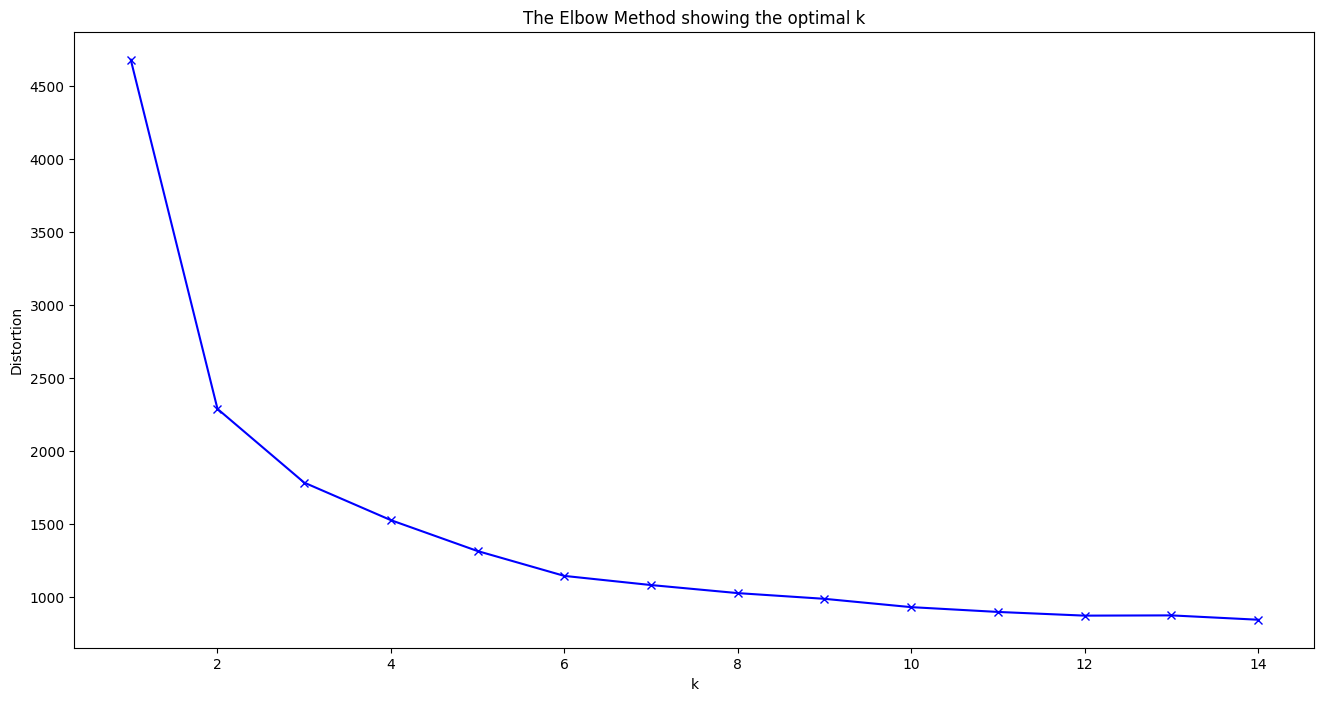

In [94]:
distortions = []
K = range(1,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X.to_numpy())
    distortions.append(kmeanModel.inertia_)


plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

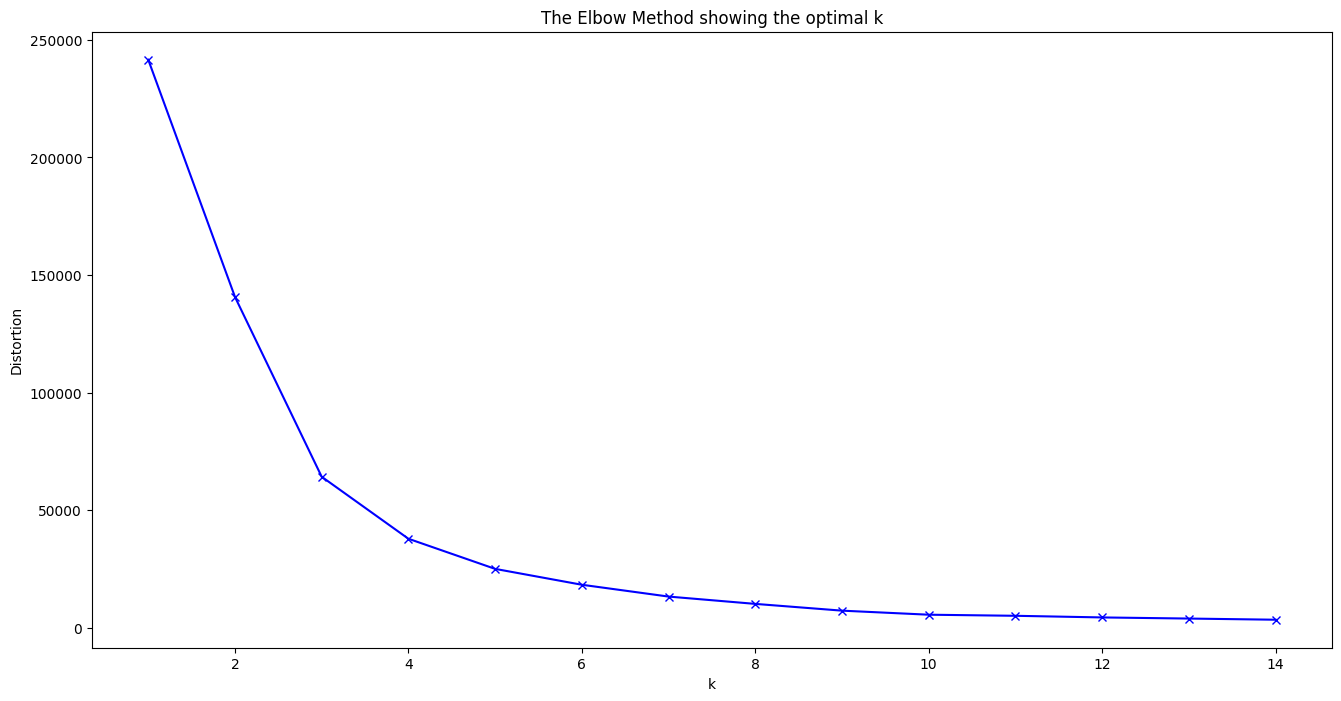

In [93]:
distortions = []
K = range(1,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(embedding)
    distortions.append(kmeanModel.inertia_)


plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [98]:
kmeans = KMeans(init="random",n_clusters=4,n_init=10,max_iter=100,random_state=42)
#kmeans.fit(embedding)
label = kmeans.fit_predict(data)
print(label)

[0 3 0 0 2 0 2 0 3 0 0 1 0 1 1 1 1 2 2 0 3 1 1 0 0 0 2 0 3 2 0 0 0 2 2 1 1
 2 3 2 0 1 3 1 1 3 0 0 1 0 3 0 0 3 2 3 1 3 3 0 0 3 2 2 0 0 2 2 1 0 1 1 1 1
 1 1 1 2 2 0 3 3 0 3 3 0 3 2 1 0 0 2 2 2 1 3 1 2 2 0 2 2 2 2 2 2 3 3 0 0 2
 3 2 0 1 0 0 2 0 0 2 2 3 3 2 0 3 1 0 3 0 1 3 0 3 3 2 1 2 3 2 2 2 1 1 3 1 3
 3 2 0 2 2 0 1 3 1 0 2 1 2 0 3 3 0 2 0 2 2 0 3 0 3 3 0 0 0 1 3 1 3 3 2 1 3
 1 1 3 2 2 0 2 3 3 2 3 1 3 0 2 3 2 0 1 3 3 3 3 0 2 0 3 3 2 1 2 1 3 3 2 1 2
 0 1 0 1 3 1 0 3 3 2 2 3 2 2 3 2 3 1 1 2 3 3 0 3 2 2 1 2 1 1 0 1 3 1 2 2 2
 1 2 0 2 0 0 3 3 3 0 2 0 3 0 1 3 3 2 1 2 3 2 3 2 2 0 0 2 2 2 3 2 2 0 0 3 2
 3 3 0 2 3 3 0 1 3 1 2 2 0 3 2 0 3 0 3 3 0 3 2 2 3 2 1 2 0 2 2 0 1 3 3 1 3
 0 2 2 2 2 2 1 1 3 0 2 3 2 1 2 2 0 0 0 1 2 3 1 3 3 3 2 2 3 2 1 1 1 1 2 0 1
 3 1 3 0 2 1 0 3 1 1 0 3 0 3 3 2 3 1 0 3 0 2 1 0 3 2 0 2 2 1 0 0 1 2 0 1 1
 3 2 0 3 2 2 1 1 3 2 1 2 1 3 0 2 2 0 1 2 2 3 3 0 1 0 2 3 3 0 2 2 3 0 0 3 2
 2 3 2 2 1 3 3 3 1 2 1 0 2 0 0 2 2 2 0 2 0 0 3 2 1 0 2 3 1 2 3 2 2 2 3 0 2
 2 0 2 1 0 1 3 0 1 3 3 3 

In [96]:
kmeans = KMeans(init="random",n_clusters=4,n_init=10,max_iter=100,random_state=42)
#kmeans.fit(embedding)
label = kmeans.fit_predict(embedding)
print(label)

[1 2 1 0 3 1 3 1 2 1 0 1 1 1 1 1 1 3 0 1 2 1 1 1 1 1 0 0 3 3 3 1 0 3 3 1 1
 3 3 3 1 1 2 1 1 3 1 1 1 1 2 0 1 2 3 3 1 2 2 1 1 2 3 3 1 1 3 0 1 1 1 1 1 1
 1 1 1 3 0 1 2 2 1 3 3 1 2 3 1 1 3 3 0 0 1 3 1 0 0 1 3 3 3 0 3 3 2 2 1 1 0
 3 3 1 1 1 1 0 1 2 0 3 2 2 3 1 2 1 1 2 3 1 2 1 3 3 0 1 3 2 3 0 0 1 1 3 1 2
 2 0 1 3 0 1 1 2 1 1 3 1 3 1 3 2 1 3 1 0 3 1 2 1 2 2 0 3 1 1 3 1 2 3 3 1 3
 1 1 2 3 3 1 0 2 2 3 3 1 3 1 3 2 3 1 1 2 3 3 2 1 3 1 3 3 0 1 0 1 2 3 3 1 3
 0 1 0 1 3 1 1 2 3 3 3 3 0 3 3 3 3 1 1 3 2 3 0 2 0 0 1 0 1 1 1 1 3 1 3 3 0
 1 0 1 3 1 0 3 2 2 1 3 1 2 1 1 2 2 0 1 3 2 0 2 3 0 1 1 0 3 0 3 3 3 1 1 2 3
 2 2 1 0 2 2 1 1 2 1 3 3 1 2 3 1 2 0 3 2 1 2 3 3 2 0 1 3 1 0 3 1 1 3 3 1 2
 1 3 3 3 3 3 1 1 3 1 0 2 3 1 3 0 1 1 1 1 0 3 1 2 2 2 3 0 3 3 1 1 1 1 0 1 1
 2 1 2 1 3 1 1 3 1 1 1 2 1 3 3 3 3 1 2 3 3 0 1 1 2 3 0 0 3 1 0 1 1 0 1 1 1
 3 3 1 2 0 3 1 1 2 0 1 0 1 2 1 3 3 1 1 3 0 2 2 1 1 1 3 2 3 0 3 0 2 1 1 3 0
 0 2 3 0 1 2 2 3 1 3 1 1 3 1 1 3 3 0 1 3 1 1 2 3 1 0 0 2 1 3 2 3 3 3 2 1 3
 3 1 0 1 1 1 2 1 1 2 2 2 

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/umap/plot.py:203: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()


<Axes: >

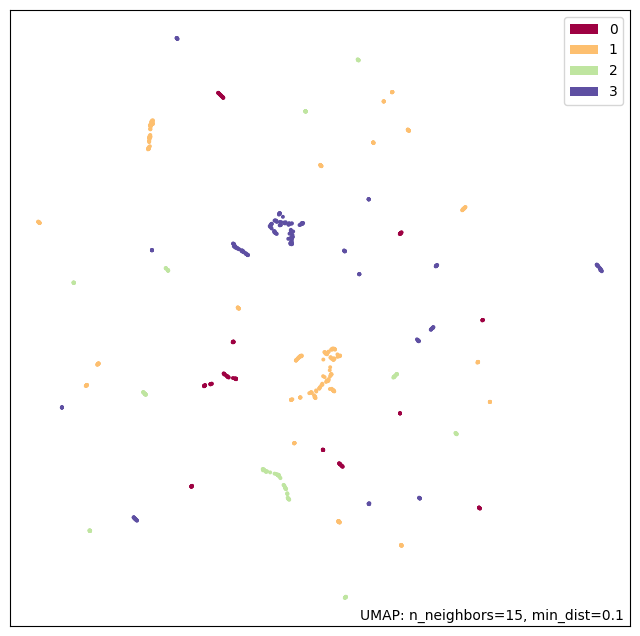

In [97]:
import umap.plot

mapper = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2).fit(embedding)
umap.plot.points(mapper, labels=label)

<Axes: >

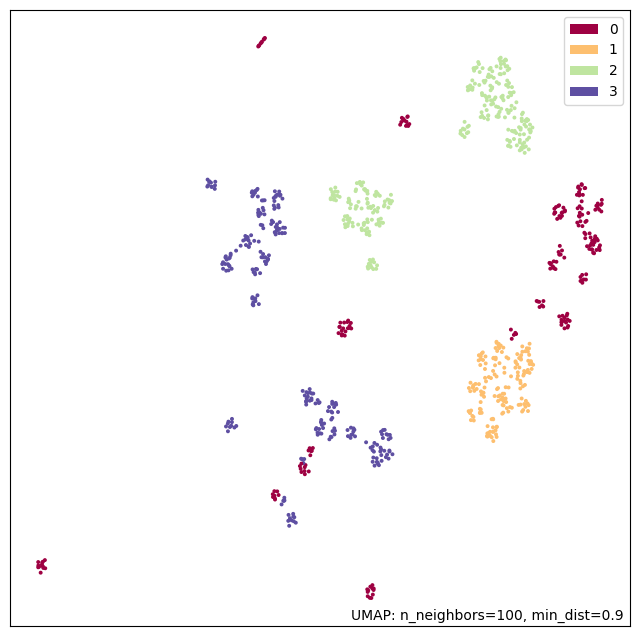

In [112]:
# erst knn with data dann umap zum plotten
import umap.plot

mapper = umap.UMAP(n_neighbors=100, min_dist=0.9, n_components=2).fit(embedding)
umap.plot.points(mapper, labels=label)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


<Axes: >

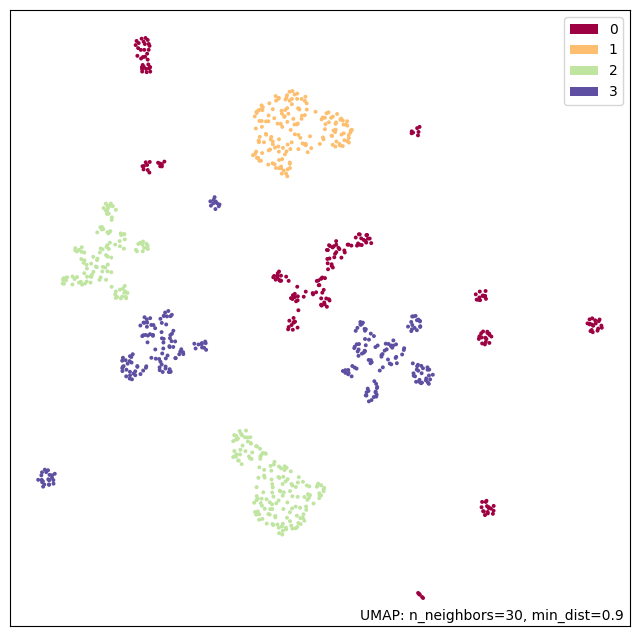

In [118]:
# erst knn with data dann umap zum plotten
import umap.plot

mapper = umap.UMAP(n_neighbors=30, min_dist=0.9, n_components=2).fit(embedding)
umap.plot.points(mapper, labels=label)

## MCA

In [119]:
import prince 

data = X

mca = prince.MCA(n_components=2, random_state=42)
mca_result = mca.fit(data)
mca_result_1 = np.asarray(mca.fit_transform(data))

In [120]:
mca_result_1

array([[-0.23902735,  0.30452717],
       [-0.21211595, -0.27484771],
       [-0.26905936,  0.26505859],
       ...,
       [ 0.17032251,  0.28255284],
       [-0.35646852,  0.26995588],
       [ 0.5485294 ,  0.21332806]])

In [121]:
mca_result = np.asarray(mca_result)
mca_result

array(MCA(random_state=42), dtype=object)

In [134]:
kmeans = KMeans(init="random",n_clusters=3,n_init=10,max_iter=100,random_state=42)
label = kmeans.fit_predict(mca_result_1)
print(label)

[2 1 2 2 1 2 1 2 1 2 2 1 2 1 1 1 1 1 0 2 1 1 1 2 2 2 0 2 0 1 2 2 2 1 1 1 1
 1 0 1 2 1 1 1 1 0 2 2 1 2 1 2 2 1 1 0 1 1 1 2 2 1 1 1 2 2 1 0 1 2 1 1 1 1
 1 1 1 1 0 2 1 1 2 0 0 2 1 1 1 2 2 1 0 0 1 0 1 0 0 2 1 1 1 0 1 1 1 1 2 2 0
 0 1 2 1 2 2 0 2 2 0 1 1 1 1 2 1 1 2 1 2 1 1 2 0 0 0 1 1 1 1 0 0 1 1 0 1 1
 1 0 2 1 0 2 1 1 1 2 1 1 1 2 0 1 2 1 2 0 1 2 1 2 1 1 2 2 2 1 0 1 1 0 1 1 0
 1 1 1 1 1 2 0 1 1 1 0 1 0 2 1 1 1 2 1 1 0 0 1 2 1 2 0 0 0 1 0 1 1 0 1 1 1
 2 1 2 1 0 1 2 1 0 1 1 0 0 1 0 1 0 1 1 1 1 0 2 1 0 0 1 0 1 1 2 1 0 1 1 0 0
 1 0 2 1 2 2 0 1 1 2 1 2 1 2 1 1 1 0 1 1 1 0 1 1 0 2 2 0 1 0 0 1 0 2 2 1 1
 1 1 2 0 1 1 2 1 1 1 1 1 2 1 1 2 1 2 0 1 2 1 1 1 1 0 1 1 2 0 1 2 1 0 0 1 1
 2 1 1 1 1 1 1 1 0 2 0 1 1 1 1 0 2 2 2 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 0 2 1
 1 1 1 2 1 1 2 0 1 1 2 1 2 0 0 1 0 1 2 0 2 0 1 2 1 1 2 0 1 1 2 2 1 0 2 1 1
 0 1 2 1 0 1 1 1 1 0 1 0 1 1 2 1 1 2 1 1 0 1 1 2 1 2 1 1 0 2 1 0 1 2 2 0 0
 0 1 1 0 1 1 1 0 1 1 1 2 1 2 2 1 1 0 2 1 2 2 1 0 1 2 0 1 1 1 1 1 1 1 1 2 1
 1 2 0 1 2 1 1 2 1 1 1 1 

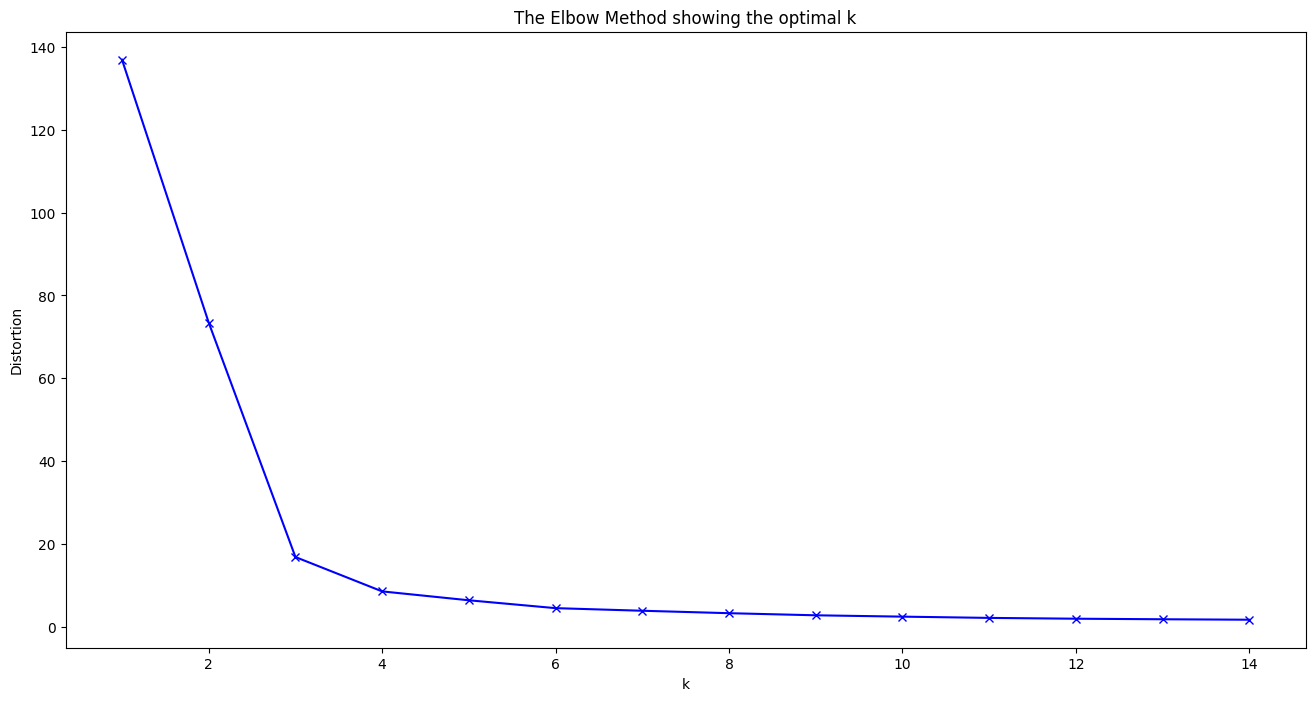

In [123]:
distortions = []
K = range(1,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(mca_result_1)
    distortions.append(kmeanModel.inertia_)


plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


In [125]:
import altair as alt
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

In [131]:
ax = mca_result.plot(X)
ax

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

In [135]:
X['Label'] = label



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


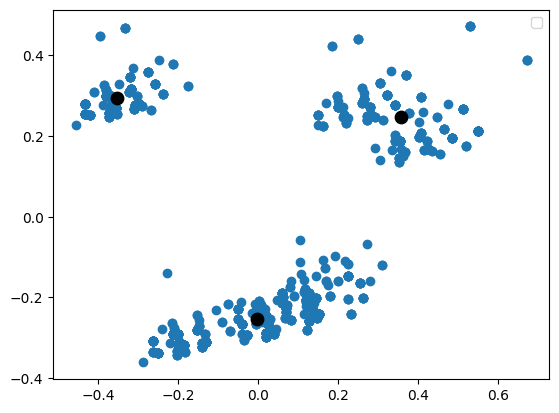

In [136]:
u_labels = np.unique(label)
centroids = kmeans.cluster_centers_

plt.scatter(mca_result_1[:,0] , mca_result_1[:,1])
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()



<Axes: >

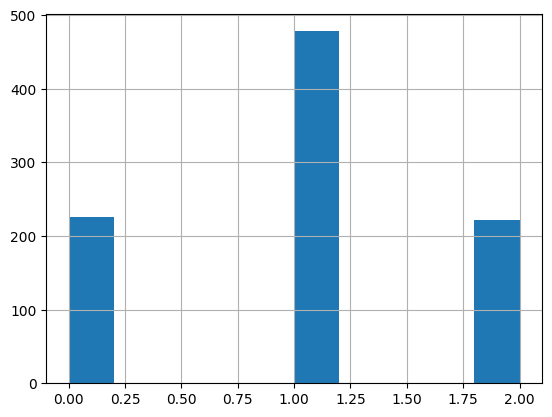

In [139]:
X['Label'].hist()

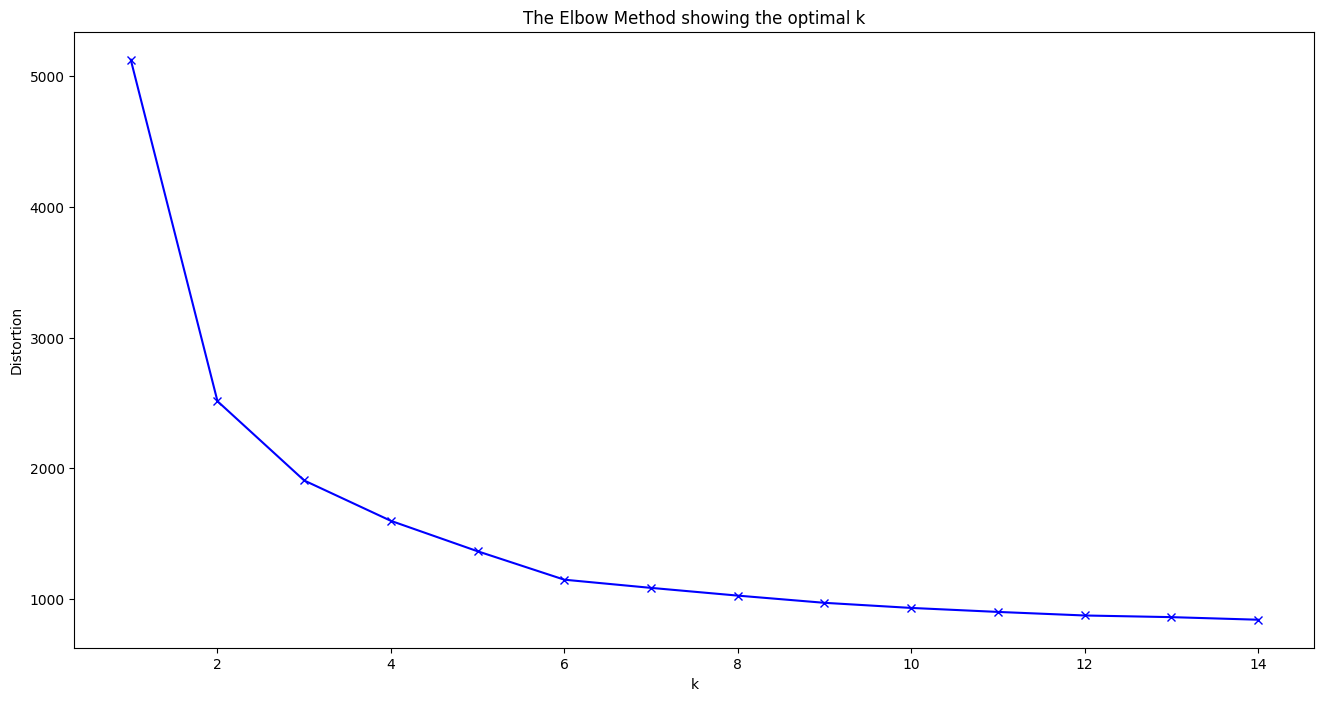

In [140]:
distortions = []
K = range(1,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)


plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


In [141]:
kmeans = KMeans(init="random",n_clusters=6,n_init=10,max_iter=100,random_state=42)
label = kmeans.fit_predict(X)
print(label)

[2 4 2 2 5 2 5 2 4 2 2 1 2 1 1 1 1 5 0 2 4 1 1 2 2 2 0 2 3 5 2 2 2 5 5 1 1
 5 3 5 2 1 4 1 1 3 2 2 1 2 4 2 2 4 5 3 1 4 4 2 2 4 5 5 2 2 5 0 1 2 1 1 1 1
 1 1 1 5 0 2 4 4 2 3 3 2 4 5 1 2 2 5 0 0 1 3 1 0 0 2 5 5 5 0 5 5 4 4 2 2 0
 3 5 2 1 2 2 0 2 2 0 5 4 4 5 2 4 1 2 4 2 1 4 2 3 3 0 1 5 4 5 0 0 1 1 3 1 4
 4 0 2 5 0 2 1 4 1 2 5 1 5 2 3 4 2 5 2 0 5 2 4 2 4 4 2 2 2 1 3 1 4 3 5 1 3
 1 1 4 5 5 2 0 4 4 5 3 1 3 2 5 4 5 2 1 4 3 3 4 2 5 2 3 3 0 1 0 1 4 3 5 1 5
 2 1 2 1 3 1 2 4 3 5 5 3 0 5 3 5 3 1 1 5 4 3 2 4 0 0 1 0 1 1 2 1 3 1 5 0 0
 1 0 2 5 2 2 3 4 4 2 5 2 4 2 1 4 4 0 1 5 4 0 4 5 0 2 2 0 5 0 3 5 0 2 2 4 5
 4 4 2 0 4 4 2 1 4 1 5 5 2 4 5 2 4 2 3 4 2 4 5 5 4 0 1 5 2 0 5 2 1 3 3 1 4
 2 5 5 5 5 5 1 1 3 2 0 4 5 1 5 0 2 2 2 1 0 3 1 4 4 4 5 0 3 5 1 1 1 1 0 2 1
 4 1 4 2 5 1 2 3 1 1 2 4 2 3 3 5 3 1 2 3 2 0 1 2 4 5 2 0 5 1 2 2 1 0 2 1 1
 3 5 2 4 0 5 1 1 4 0 1 0 1 4 2 5 5 2 1 5 0 4 4 2 1 2 5 4 3 2 5 0 4 2 2 3 0
 0 4 5 0 1 4 4 3 1 5 1 2 5 2 2 5 5 0 2 5 2 2 4 0 1 2 0 4 1 5 4 5 5 5 4 2 5
 5 2 0 1 2 1 4 2 1 4 4 4 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


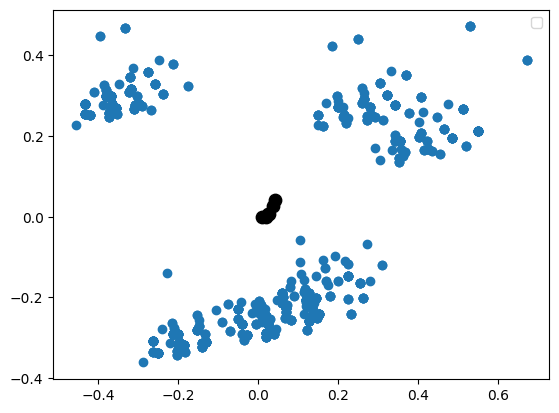

In [142]:
X['Label'] = label

u_labels = np.unique(label)
centroids = kmeans.cluster_centers_

plt.scatter(mca_result_1[:,0] , mca_result_1[:,1])
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()



<Axes: >

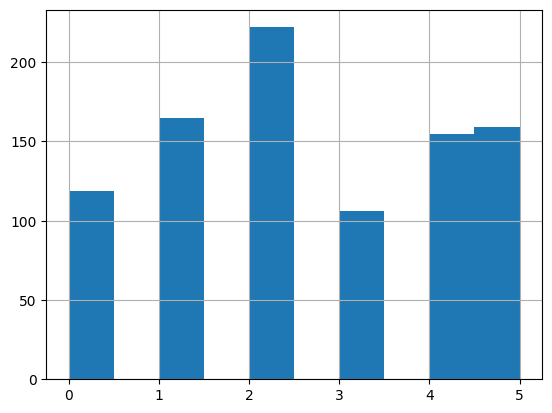

In [143]:
X['Label'].hist()